<a href="https://colab.research.google.com/github/nayanatharawidyalankara/Capstone-Project-/blob/main/ML_Foundation_Batch_2__Capstone_Project_Nayanathara_Widyalankara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Foundation (Batch 2)- Capstone Project
# Prediction of Classification of Raisin Grains
By: Nayanathara Widyalankara

Registrartion No: 257

*   Model: Classification
*   Dataset: UCI Machine Learning Repository
*   Outout: Predict the class of the raisin Grains



In [105]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix 

# Loading the DataSet

In [106]:
file_name = 'https://raw.githubusercontent.com/nayanatharawidyalankara/Capstone-Project-/main/Raisin_Dataset.csv'

# Load data File

data = pd.read_csv(file_name)
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [107]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

# Data Pre Processing

## Data Exploration


In [108]:
data.shape

(900, 8)

In [109]:
data.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
555,121034,518.720443,305.735810,0.807839,125665,0.706665,1418.304,Besni
23,61251,301.507790,273.659941,0.419754,64732,0.643596,971.769,Kecimen
838,92619,398.620729,296.882933,0.667315,95666,0.742997,1173.390,Besni
539,96443,541.200074,232.548039,0.902977,101271,0.553411,1352.482,Besni
246,46120,300.097158,201.206314,0.741936,49996,0.628972,907.025,Kecimen


In [110]:
data['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [111]:
data.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [112]:
data.describe(include='all')

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kecimen
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,NaN
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,NaN
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,NaN
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,NaN
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,NaN
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,NaN


In [113]:
print(data.columns[data.isnull().any()]) #Confirm that there are no any missing values

Index([], dtype='object')


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [115]:
# identify duplicates
duplicates = data[data.duplicated()]
duplicates

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


## Coverting Categorical values into numerical values

In [116]:
data['Class'] = data['Class'].replace({"Kecimen": 0, "Besni": 1})
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [117]:
data.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
593,124166,525.945357,304.156469,0.815821,126960,0.728999,1388.684,1
294,70196,373.197647,243.881105,0.756935,71937,0.690790,1024.256,0
785,62526,357.205087,228.862930,0.767788,65994,0.707308,1006.598,1
773,106938,498.433852,274.590275,0.834567,110118,0.773187,1285.854,1
620,78984,427.494276,236.882575,0.832438,82328,0.698417,1169.476,1


## Study the Behavior of Data

In [ ]:
for h in data.columns:
  sns.displot(kind='hist', x=h, data=data, bins=10, kde=True)

In [ ]:
data.hist(bins=50, figsize=(20, 20))

In [120]:
data.skew()

Area               1.175237
MajorAxisLength    0.989544
MinorAxisLength    0.800049
Eccentricity      -1.327503
ConvexArea         1.242904
Extent            -1.151505
Perimeter          1.017761
Class              0.000000
dtype: float64

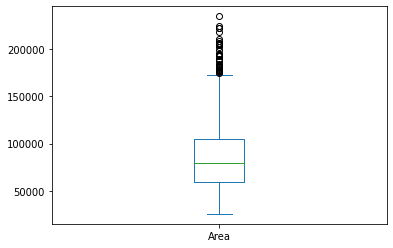

<Figure size 432x288 with 0 Axes>

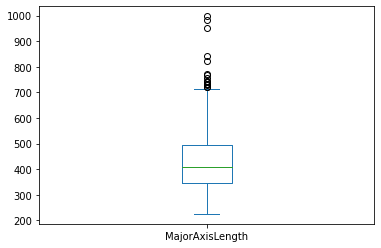

<Figure size 432x288 with 0 Axes>

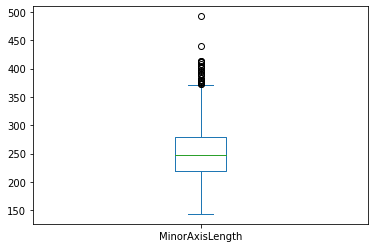

<Figure size 432x288 with 0 Axes>

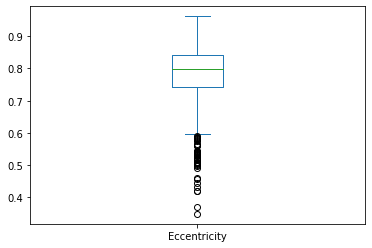

<Figure size 432x288 with 0 Axes>

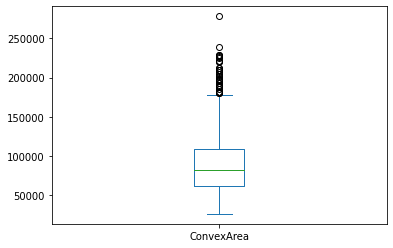

<Figure size 432x288 with 0 Axes>

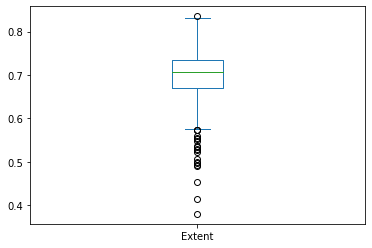

<Figure size 432x288 with 0 Axes>

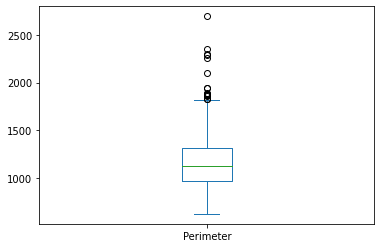

<Figure size 432x288 with 0 Axes>

In [121]:
outliers=['Area','MajorAxisLength','MinorAxisLength', 'Eccentricity','ConvexArea','Extent', 'Perimeter']

for feature in outliers:
  plt.figure()
  data[feature].plot(kind='box')
  plt.show()
  plt.figure()

In [122]:
outliers=['Area','MajorAxisLength','MinorAxisLength', 'Eccentricity','ConvexArea','Extent', 'Perimeter']
print("Old Shape: ", data.shape)
for feature in outliers:
  Q1= np.percentile(data[feature], 25,
                   interpolation = 'midpoint')
  Q3 = np.percentile(data[feature], 75,
                   interpolation = 'midpoint')
  IQR = Q3- Q1
  upper= Q3+1.5*IQR
  lower= Q1-1.5*IQR
  data=data[(data[feature]>lower) & (data[feature]<upper)]

print("New Shape: ", data.shape)

Old Shape:  (900, 8)
New Shape:  (778, 8)


In [124]:
data['Class'].value_counts()

0    408
1    370
Name: Class, dtype: int64

# Checking corelation for feature selection

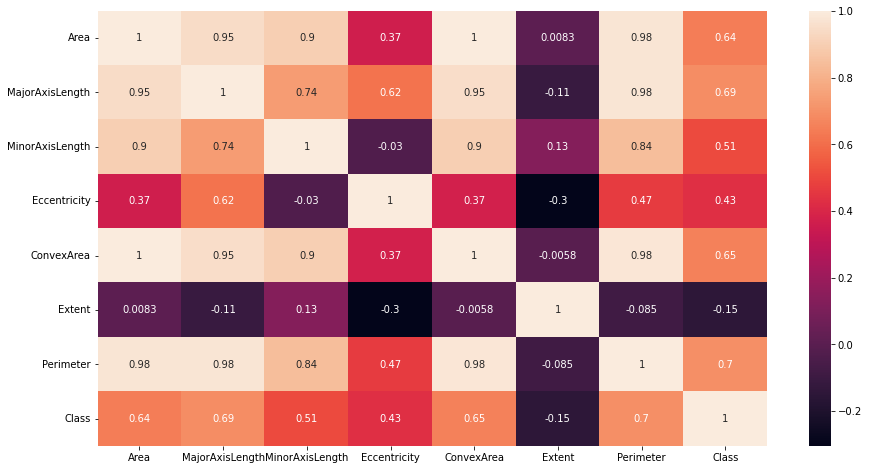

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.945806,0.902215,0.365467,0.999098,0.008288,0.976482,0.643542
MajorAxisLength,0.945806,1.000000,0.735377,0.617470,0.949618,-0.106022,0.975649,0.689276
MinorAxisLength,0.902215,0.735377,1.000000,-0.029937,0.898213,0.132312,0.843495,0.506881
Eccentricity,0.365467,0.617470,-0.029937,1.000000,0.374561,-0.304394,0.469204,0.433676
ConvexArea,0.999098,0.949618,0.898213,0.374561,1.000000,-0.005761,0.981856,0.654234
Extent,0.008288,-0.106022,0.132312,-0.304394,-0.005761,1.000000,-0.084632,-0.146835
Perimeter,0.976482,0.975649,0.843495,0.469204,0.981856,-0.084632,1.000000,0.695691
Class,0.643542,0.689276,0.506881,0.433676,0.654234,-0.146835,0.695691,1.000000


In [125]:
correlation_matrix = data.corr()

plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()
correlation_matrix

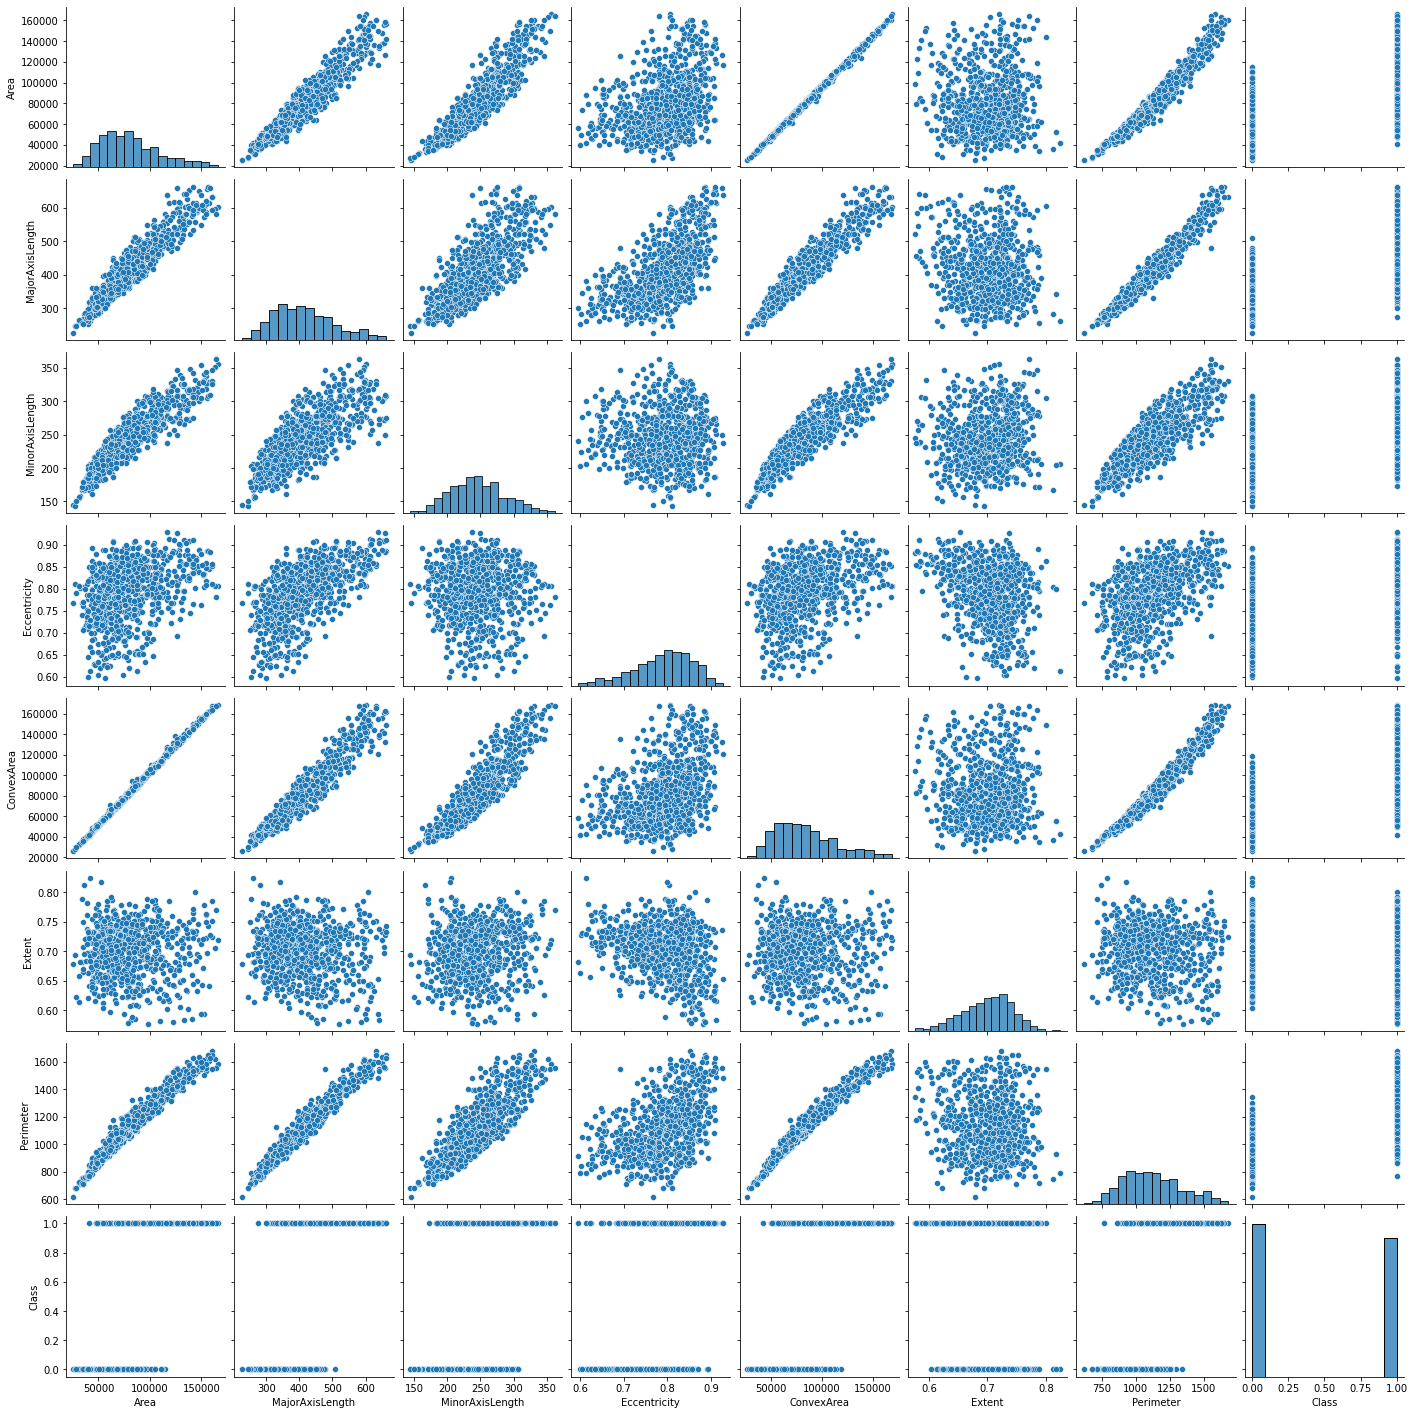

In [126]:
sns.pairplot(data)
plt.show()

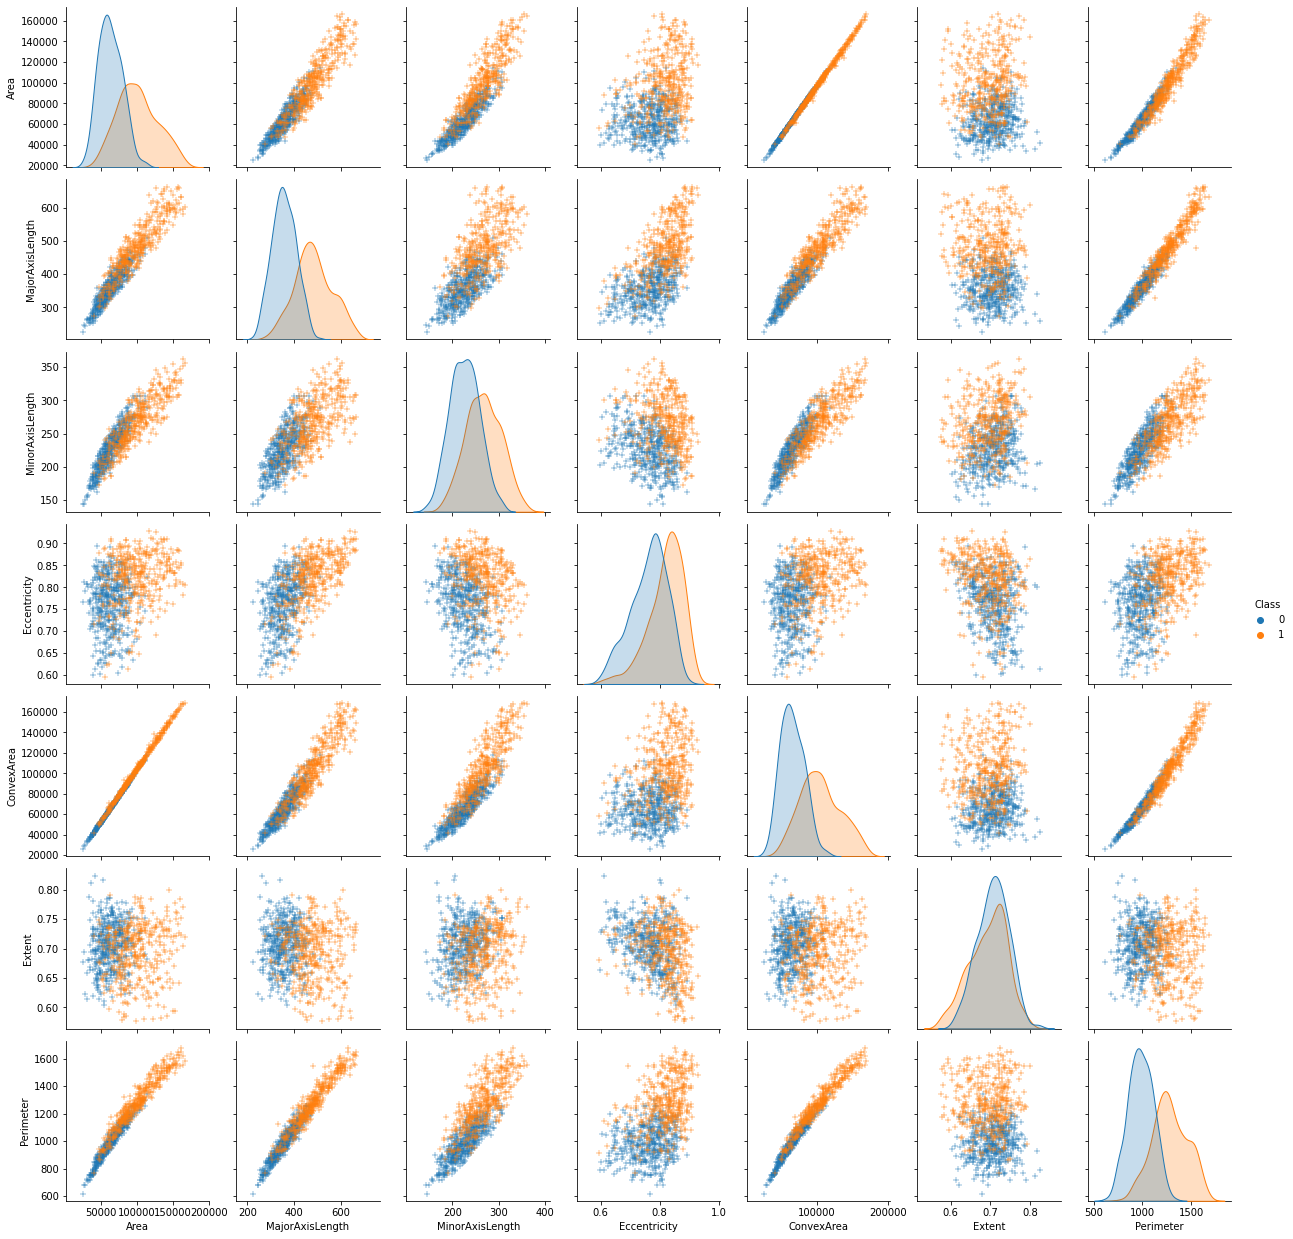

In [127]:
sns.pairplot(data, hue='Class', markers='+')
plt.show()

# Preprocessing - Feature selection
## Selecting X and y

In [132]:
X_variables = ['MinorAxisLength', 'ConvexArea']

In [131]:
y_variable = 'Class'

In [138]:
print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X_variables = ['MinorAxisLength', 'ConvexArea']
y_variable = Class


In [134]:
X = data[X_variables].values
y = data[y_variable].values

## Train Test Split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 544
Test sample size  = 234


# Model building
## Model Training Function

In [139]:
def model_train(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

    

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  'y act': y_test,
                  'y pred': y_pred
                  })

## Selecting the best model

In [140]:
models = []
models.append(model_train(LogisticRegression(n_jobs=3, random_state = 0), 'lgr1', X_train, y_train, X_test, y_test))
models.append(model_train(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), 'KNeBR', X_train, y_train, X_test, y_test))
models.append(model_train(GaussianNB(), 'Gaus', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0), 'RF', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(criterion = 'gini', random_state = 0 ), 'DeciT-G', X_train, y_train, X_test, y_test))
models.append(model_train(DecisionTreeClassifier(criterion = 'entropy', random_state = 0 ), 'DeciT-En', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models

,model_name,model,accuracy,precision,f1_score,roc_auc,y act,y pred
0,lgr1,"LogisticRegression(n_jobs=3, random_state=0)",0.893162,0.863636,0.893349,0.946549,"[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, ..."
1,KNeBR,KNeighborsClassifier(),0.807692,0.767857,0.808112,0.869214,"[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, ..."
2,Gaus,GaussianNB(),0.833333,0.817308,0.833256,0.908379,"[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, ..."
3,RF,"(DecisionTreeClassifier(criterion='entropy', m...",0.871795,0.850467,0.871899,0.918051,"[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, ..."
4,DeciT-G,DecisionTreeClassifier(random_state=0),0.786325,0.720000,0.786637,0.792913,"[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, ..."
5,DeciT-En,"DecisionTreeClassifier(criterion='entropy', ra...",0.807692,0.754237,0.808196,0.811406,"[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, ..."


## Tuning Parameter using grid search

In [ ]:
# perparameters search for Logistic regression

parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['none', 'l1', 'l2', 'elasticnet']}
gs_model = GridSearchCV(LogisticRegression(), parameters)
gs_model.fit(X_train, y_train)

In [154]:
# Print the tuned parameters and score
print("Tuned Model Parameters: {}".format(gs_model.best_params_))
print("Best model score: {}".format(gs_model.best_score_))

Tuned Model Parameters: {'penalty': 'none', 'solver': 'lbfgs'}
Best model score: 0.8235643900781515


In [155]:
y_pred = gs_model.predict(X_test) 

print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       129
           1       0.86      0.90      0.88       105

    accuracy                           0.89       234
   macro avg       0.89      0.89      0.89       234
weighted avg       0.89      0.89      0.89       234

[[114  15]
 [ 10  95]]


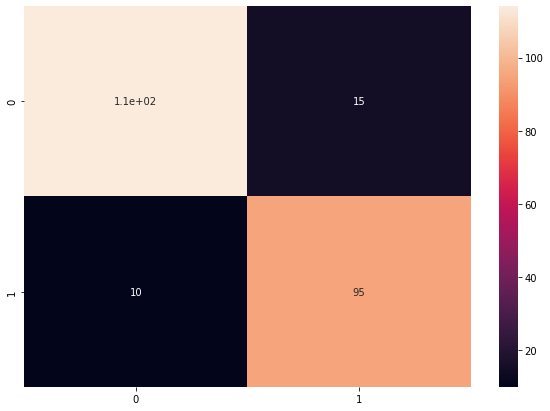

In [156]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Selecting the best model

In [157]:
# Select best model 
model = models.query("model_name=='lgr1'")
model 

,model_name,model,accuracy,precision,f1_score,roc_auc,y act,y pred
0,lgr1,"LogisticRegression(n_jobs=3, random_state=0)",0.893162,0.863636,0.893349,0.946549,"[1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, ..."


In [158]:
#extracting the model name from the dictonery 
model = model['model'].values[0]
model

LogisticRegression(n_jobs=3, random_state=0)

# Saving the model

In [163]:
import pickle

save_file = 'model_lgr1.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [180]:
# loading from file
model_ = pickle.load(open(save_file, 'rb'))
model_

LogisticRegression(n_jobs=3, random_state=0)